In [1]:
import numpy as np
import collections
import argparse
import matplotlib.pyplot as plt

def read_gtf(filepath):
    chrom = collections.defaultdict(lambda:0)
    with open(filepath, 'r') as gtf:
        for line in gtf:
            line = line.strip().split('\t')
            if line[0][0] == '#' or line[2] != 'gene': continue
            geneid = line[8].split(';',1)[0].split(' ')[1].replace('"','')
            chrom[geneid] = line[0]
    return chrom


class HsqResults(collections.namedtuple('_HsqResults', ['geneid', 'est', 'se'])):
    __slots__ = ()


def read_hsq(filepath):
    hsq = list() 
    with open(filepath, 'r') as mfile:
        for line in mfile:
            line = line.strip().split()
            if len(line) < 3: continue
            hsq.append(HsqResults(geneid = line[0],
                                  est = float(line[1]),
                                  se = float(line[2])
                                 ))
    return hsq

In [2]:
gtffile = '../../results/gencode.v12.annotation.gtf'
chrom = read_gtf(gtffile)

In [28]:
#hsqfile_greml = '../../results/genome_wide/greml_20pc_hsq.txt'
#hsqfile_greml_ldms = '../../results/genome_wide/greml-ldms_20pc_hsq.txt'
#hsqfile_greml = '../../results/genome_wide/greml_20pc_hsq_noconstraint.txt'
#hsqfile_greml_ldms = '../../results/genome_wide/greml-ldms_20pc_hsq_noconstraint.txt'
#hsqfile_greml = '../../chr1_trial/GEUVADIS_EUR_chr1_greml_20pc.txt'
#hsqfile_greml_ldms = '../../chr1_trial/GEUVADIS_EUR_chr1_greml-ldms_20pc.txt'
#hsqfile_greml = '../../results/cis_snps/greml.txt'
#hsqfile_greml_ldms = '../../results/cis_snps/greml-ldms.txt'
hsqfile_greml = '../../results/cis_snps/greml_noconstraint.txt'
hsqfile_greml_ldms = '../../results/cis_snps/greml-ldms_noconstraint.txt'

hsq_greml = read_hsq(hsqfile_greml)
hsq_greml_ldms = read_hsq(hsqfile_greml_ldms)

In [29]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray

    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

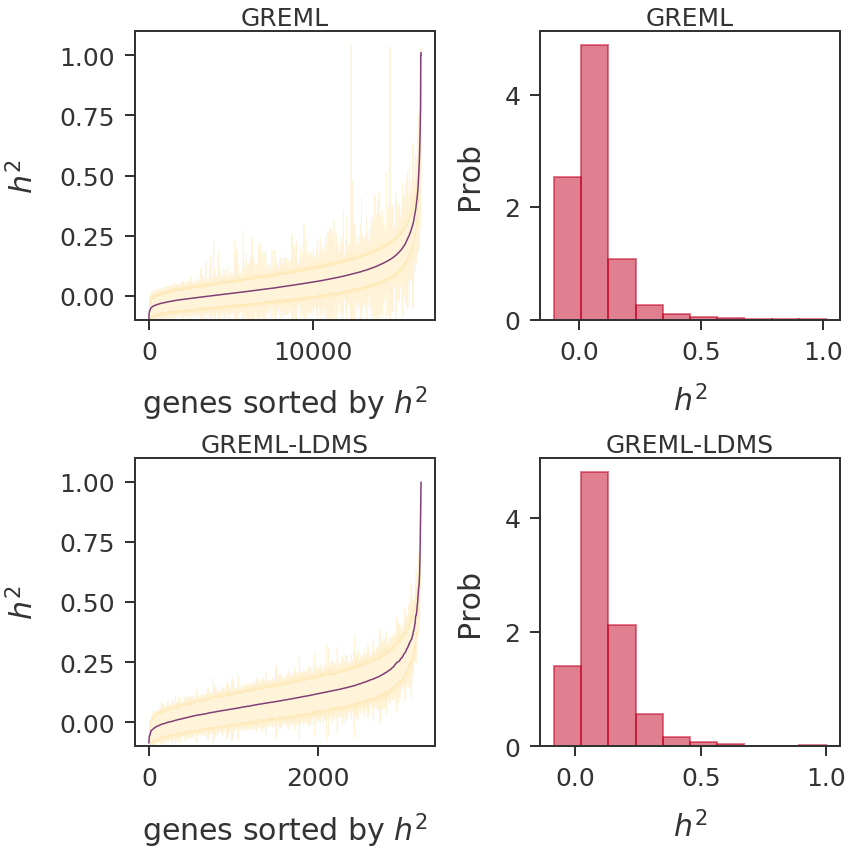

In [31]:
def plot_hsq(hsq, ax1, ax2, titletext):
    bordercolor = '#333333'
    borderwidth = 2
    axis_font_size = 30
    label_font_size = 25
    legend_font_size = 25
    
    hsq_mod = [x for x in hsq if x.se < 1]

    hsq_sorted = sorted(hsq_mod, key=lambda x: x.est)
    yvals = np.array([x.est for x in hsq_sorted])
    xvals = np.arange(len(yvals)) #/ len(yvals)
    yerr = np.array([x.se for x in hsq_sorted])
    
    #ax1.set_xlim([-0.02, 1.02])
    ax1.set_ylim([-0.1, 1.1])
    ax1.plot(xvals, yvals, color = colors[1])
    ax1.set_title(titletext, {'fontsize':legend_font_size, 'color': bordercolor})
    ax1.set_xlabel(r'genes sorted by $h^2$', {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)
    ax1.set_ylabel(r'$h^2$', {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)

    yupper = yvals + yerr
    ylower = yvals - yerr
    ax1.fill_between(xvals, ylower, yupper, color = colors[0], alpha=0.15)

    ax2.hist(yvals, color=colors[4], alpha=0.5, linewidth=2, edgecolor=colors[4], normed = True)
    ax2.set_xlabel(r'$h^2$', {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)
    ax2.set_ylabel(r'Prob', {'size': axis_font_size, 'color': bordercolor}, labelpad = 20)
    ax2.set_title(titletext, {'fontsize':legend_font_size, 'color': bordercolor})
    
    for ax in [ax1, ax2]:
        ax.tick_params(axis='both', which = 'major',
                       length = 10, width = borderwidth, pad=10,
                       labelsize = label_font_size,
                       color = bordercolor,
                       labelcolor = bordercolor,
                       bottom = True, top = False, left = True, right = False
                      )
        for side, border in ax.spines.items():
            border.set_linewidth(borderwidth)
            border.set_color(bordercolor)
            
        #ax.grid(color='dimgray', lw=0.5, alpha=0.5)
    
    return
    
fig = plt.figure(figsize=(12, 12))
colors = kelly_colors_hex

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plot_hsq(hsq_greml, ax1, ax2, 'GREML')
plot_hsq(hsq_greml_ldms, ax3, ax4, 'GREML-LDMS')

plt.tight_layout()

#plt.savefig('../../results/genome_wide/heritability_genome_wide_noconstraint.pdf')
#plt.savefig('../../results/genome_wide/heritability_chr1.pdf')
#plt.savefig('../../results/cis_snps/heritability_cis_1e6window.pdf')
plt.savefig('../../results/cis_snps/heritability_cis_1e6window_noconstraint.pdf')
plt.show()

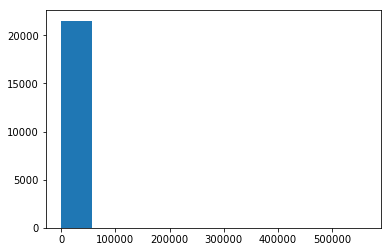

In [16]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

y = [x.se for x in hsq_greml]

ax1.hist(y)
plt.show()

In [32]:
[x for x in hsq_greml if x.se > 0.5]

[HsqResults(geneid='ENSG00000235235.4', est=0.088369, se=0.956575),
 HsqResults(geneid='ENSG00000223816.3', est=0.149339, se=0.886958),
 HsqResults(geneid='ENSG00000169313.8', est=0.437275, se=1.043023)]